<a href="https://colab.research.google.com/github/martinbedia/mineria/blob/main/30oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 30 octubre

## Clustering

- Aprendizaje supervisado y no supervisado.
- Los clusters deben ser lo mas diferenciados y compactos posible.
- Conjuntos de forma esferica funcionan bien con k-means pero los otros no.
- Creo tantas variables dummy como categorias-1 haya.
- Es no deterministe, si lo ejecutamos dos veces pueden salir cosas  diferentes si los centros estan muy cerca.
- Validacion: cohesion y separacion

## k means

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
# importar el archivo usando pandas
df = pd.read_csv('clustering_ejemplo1.csv')
df


,variable_x,variable_y,grupo
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1
...,...,...,...
295,1.973698,1.579798,1
296,2.518342,1.391766,1
297,0.438990,4.535929,0
298,0.369479,7.791105,3


In [3]:
# utilizar to_numpy() sobre del DataFrame
# dividir el conjunto de datos en dos partes, para entrenar el modelo
x = df[['variable_x','variable_y']].to_numpy()
type(x)

numpy.ndarray

In [4]:
# se saca la variable de la informacion real de la etiqueta o grupo al que pertenece
grupos = df['grupo'].to_numpy()
grupos

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [5]:
import matplotlib.pyplot as plt

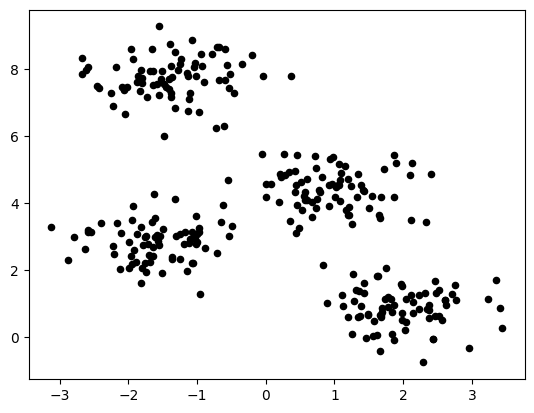

In [6]:
plt.scatter(x[:,0],x[:,1], c='black', s=20)    # c para color y s para el tamaño de los puntos
# plt.show()

Parece que hay cuatro clusters

In [7]:
# x es el conjunto de datos
# n_clusters es el valor de k, cuantos clusters queremos
# rseed valor de la semilla aleatoria

def crear_cluster(x,n_clusters,rseed):

  # 1. inicializar los clusters de forma aleatoria, hay que elegir n_clusters puntos que funcionen como centros en la primera iteracion
  rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
  i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
  centros = x[i]
  z=0  # iteraciones, vueltas que da el bucle

  # 2. realizar un bucle para la asignacion de objetos y actualizacion
  while True:
    z+=1
    # 2.1 asigno cada objeto al cluster mas cercano
    clusters = pairwise_distances_argmin(x,centros)

   # 2.2 calculo el nuevo centro del cluster
    nuevos_centros = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

   # 2.3 si no actualice los centros, salgo del bucle
    if np.all(centros == nuevos_centros):
     break
    centros = nuevos_centros

  return centros,clusters,z


In [8]:
from sklearn.metrics import pairwise_distances_argmin
pairwise_distances_argmin(x,centros)   #  para cada una de las filas de x cual es el centro al que tienen menor distancia

NameError: ignored

In [9]:
# escribo y luego lo paso a la funcion de arriba
# inicializacion de los clusters
rseed = 5
n_clusters = 3

rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
centros = x[i]
centros

array([[-2.45809975,  7.51178724],
       [-1.86849125,  3.07982487],
       [ 2.40615694,  4.87047502]])

In [10]:
rseed = 3
n_clusters = 4
centros, clusters,z = crear_cluster(x,n_clusters,rseed)

In [ ]:
crear_cluster(x,n_clusters,rseed)

<function matplotlib.pyplot.show(close=None, block=None)>

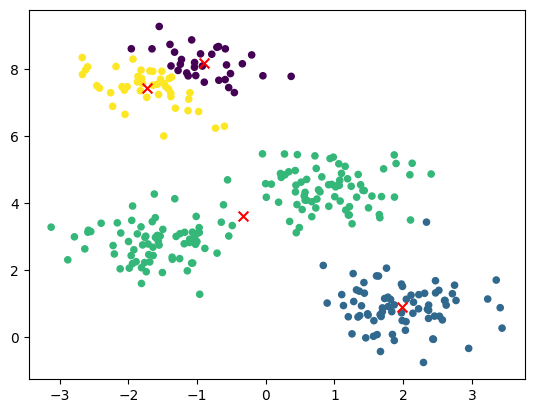

In [12]:
plt.scatter(x[:,0],x[:,1], c=clusters, s=20)
plt.scatter(centros[:,0],centros[:,1],c='red',marker='x',s=50)
plt.show

In [13]:
from sklearn.cluster import KMeans
n_clusters = 4
modelo = KMeans(n_clusters,random_state=0)
modelo

KMeans(n_clusters=4, random_state=0)

In [14]:
type(modelo)   # tipo estimador si empieza por _

sklearn.cluster._kmeans.KMeans

In [15]:
clusters = modelo.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reiniciar el entorno y volver a ejecutar los import, cargar el df y la x y los n_clusters

In [16]:
centros = modelo.cluster_centers_

<function matplotlib.pyplot.show(close=None, block=None)>

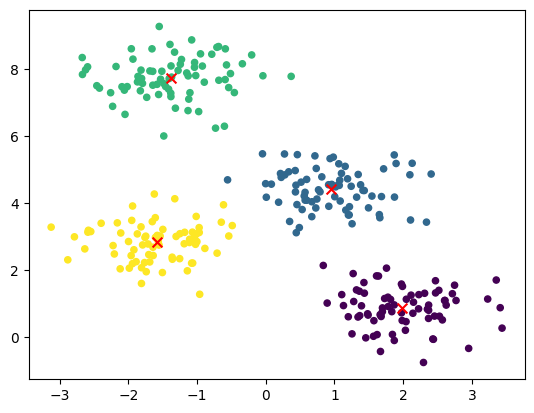

In [17]:
plt.scatter(x[:,0],x[:,1], c=clusters, s=20)
plt.scatter(centros[:,0],centros[:,1],c='red',marker='x',s=50)
plt.show

In [18]:
modelo.n_iter_

3

In [19]:
modelo.labels_

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3], d

# 3 Noviembre

In [27]:
def crear_cluster(x,n_clusters,rseed):

  # 1. inicializar los clusters de forma aleatoria, hay que elegir n_clusters puntos que funcionen como centros en la primera iteracion
  rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
  i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
  centros = x[i]

  nrows = 2
  ncols = 4
  fig, axs = plt.subplots(nrows, ncols, figsize = (16,8))
  row = 0
  col = 0
  num_iter = 1

  # 2. realizar un bucle para la asignacion de objetos y actualizacion
  while True:

    # 2.1 asigno cada objeto al cluster mas cercano
    clusters = pairwise_distances_argmin(x,centros)

    axs[row, col].scatter(x[:,0],x[:,1], c= clusters)
    axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red', s=100)
    axs[row, col].set_title('Iter {}'.format(num_iter))
    num_iter += 1

    col +=1
    if col == ncols:
      col = 0
      row+=1

   # 2.2 calculo el nuevo centro del cluster
    nuevos_centros = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

   # 2.3 si no actualice los centros, salgo del bucle
    if np.all(centros == nuevos_centros):
     break
    centros = nuevos_centros

  plt.show()
  return centros,clusters,z

IndexError: ignored

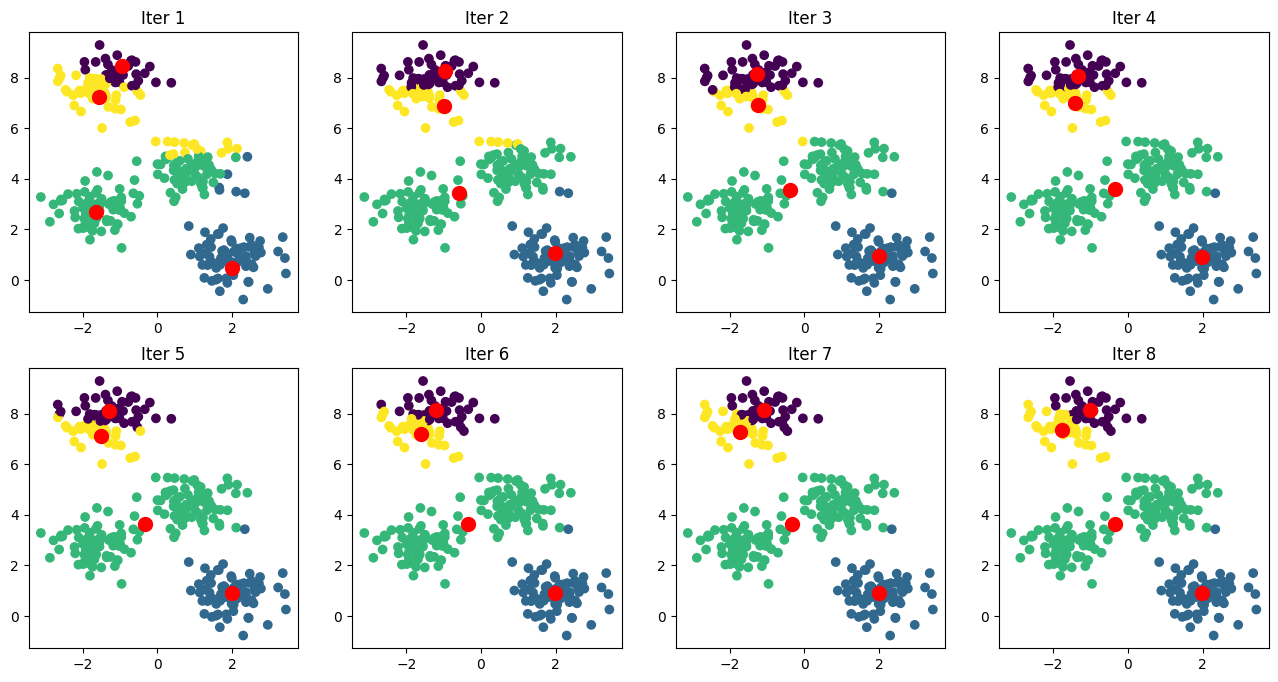

In [28]:
rseed = 3
n_clusters = 4
crear_cluster(x,n_clusters,rseed)

In [32]:
df = pd.read_csv('clustering_ejemplo3.csv')
x = df.to_numpy()

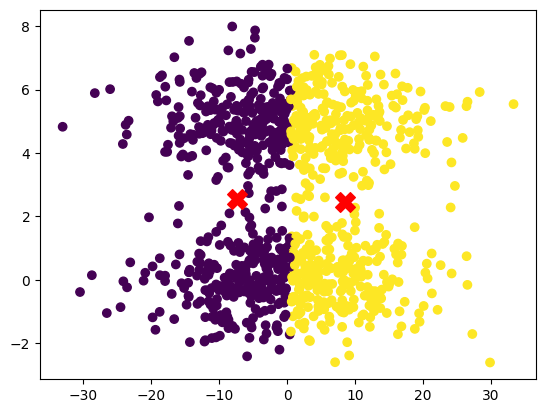

In [41]:
plt.scatter(x[:,0],x[:,1],c=clusters)
plt.scatter(centros[:,0],centros[:,1],color='red',marker='X',s=200)

In [38]:
modelo = KMeans(2,random_state=0)
clusters = modelo.fit_predict(x)
centros = modelo.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
punto1 = np.array([5,50])
punto2 = np.array([6,50])
punto3 = np.array([7,50])
punto4 = np.array([5,51])
punto5 = np.array([5,52])

distancia_1_2 = np.linalg.norm(punto1 - punto2)    # devuelve la distancia entre dos puntos
distancia_1_3 = np.linalg.norm(punto1 - punto3)
distancia_1_4 = np.linalg.norm(punto1 - punto4)
distancia_1_5 = np.linalg.norm(punto1 - punto5)

print("Distancia entre 1 y 2:", distancia_1_2)
print("Distancia entre 1 y 3:", distancia_1_3)
print("Distancia entre 1 y 4:", distancia_1_4)
print("Distancia entre 1 y 5:", distancia_1_5)



Distancia entre 1 y 2: 1.0
Distancia entre 1 y 3: 2.0
Distancia entre 1 y 4: 1.0
Distancia entre 1 y 5: 2.0


(0.0, 100.0)

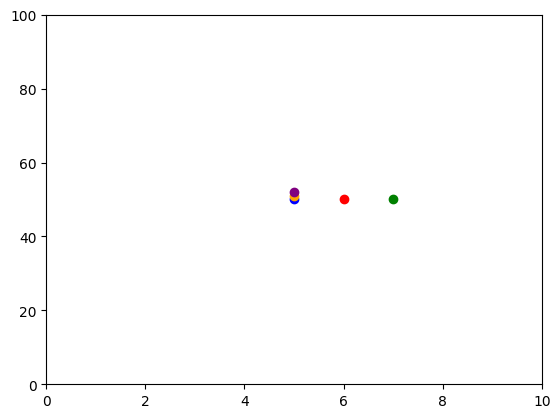

In [44]:
plt.scatter(punto1[0],punto1[1], c='blue')
plt.scatter(punto2[0],punto2[1], c='red')
plt.scatter(punto3[0],punto3[1], c='green')
plt.scatter(punto4[0],punto4[1], c='orange')
plt.scatter(punto5[0],punto5[1], c='purple')
plt.xlim(0,10)
plt.ylim(0,100)